<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Install

In [4]:
! pip install min-dalle
! nvidia-smi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Sun Jul  3 19:28:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+-------------

### Load Model

In [5]:
from min_dalle import MinDalle

model = MinDalle(is_mega=True, is_reusable=True)

initializing MinDalle
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


### Generate Images
Note: a 3x3 grid will only work if you were allocated a P100 GPU

tokenizing text
['Ġdali']
['Ġpainting']
['Ġof']
['Ġwal', 'le']
text tokens [0, 21853, 1545, 111, 563, 92, 2]
encoding text tokens
sampling image tokens
detokenizing image


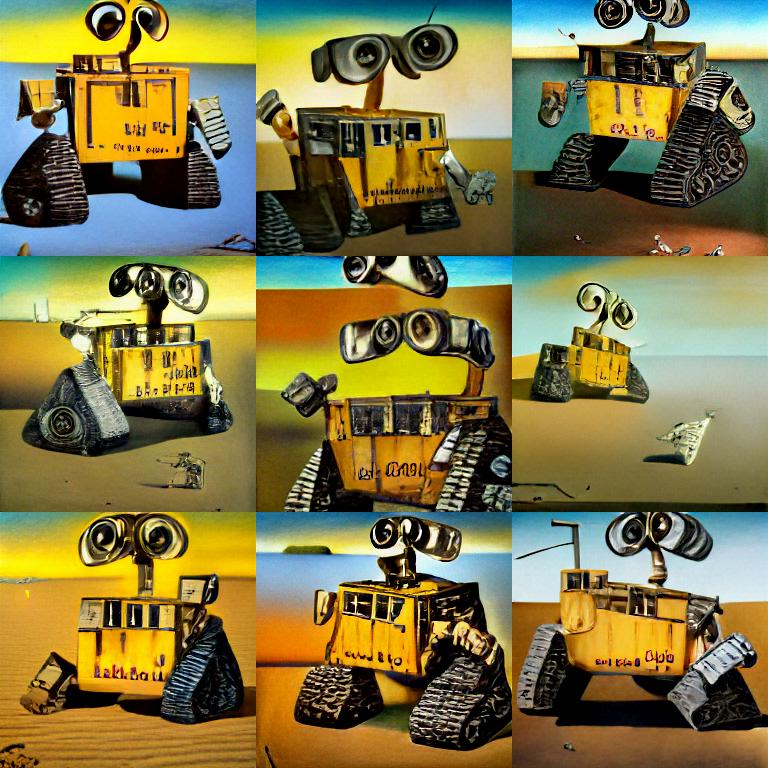

CPU times: user 35 s, sys: 0 ns, total: 35 s
Wall time: 34.7 s


In [8]:
%%time

text = "Dali painting of WallE" #@param {type:"string"}
seed = 0 #@param {type:"integer"}
grid_size =  2#@param {type:"integer"}

display(model.generate_image(text, seed, grid_size))